In [1]:
from mfccspectrogram import *

In [52]:
import librosa
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

def extract():
    # load the audio file
    filename = r'static\audios\CantinaBand3.wav'
    y, sr = librosa.load(filename)

    # extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=100)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)

    # extract spectral contrast
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    contrast_mean = np.mean(contrast, axis=1)
    contrast_std = np.std(contrast, axis=1)

    # extract chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)

    # plot the features
    fig0 = px.line(y=mfccs_mean, title=f'MFCCs for {filename}' )
    for i in range(mfccs.shape[1]):
        fig0.add_scatter(y=mfccs[:, i], mode='lines', name=f'MFCC {i+1}') 
    # contrast
    fig1 = px.area(y=contrast_mean, title=f'Spectral contrast for {filename}',
               text=contrast_mean.astype(int), range_y=[0, contrast.max()],
               range_x=[-1, contrast.shape[0]], labels=dict(x="Time frame", y="Spectral contrast"))
    
    # chroma
    fig2 = px.line(y=chroma_mean, title=f'Chroma for {filename}' )
    for i in range(chroma.shape[1]):
        fig2.add_scatter(y=chroma[:, i], mode='lines', name=f'Chroma {i+1}', 
                        line=dict(color='rgba(255,0,255,0.5)', width=0.5, dash='dot'))
  
    return {
        'mfccs': mfccs,
        'contrast': contrast,
        'chroma': chroma,
        'mfcc_graph': fig0,
        'contrast_graph': fig1,
        'chroma_graph': fig2
    }


def spectrogram(mfccs , contrast , chroma):                          #plot spectrogram
    fig, axs = plt.subplots(3, 1, figsize=(15, 10))
    sns.heatmap(mfccs, ax=axs[0])
    sns.heatmap(contrast, ax=axs[1])
    sns.heatmap(chroma, ax=axs[2])
    plt.savefig('static\images\mfccs_heatmap.png', bbox_inches='tight')

def plotly_spectrogram(mfccs):                   #plot spectrogram using plotly
    fig = px.imshow(result['mfccs'], zmin=-100, zmax=200, origin='lower', aspect='auto', color_continuous_midpoint=0)
    fig.show()

In [3]:
filename = r'static\audios\CantinaBand3.wav'
y, sr = librosa.load(filename)

# extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=100)
mfccs_mean = np.mean(mfccs, axis=1)
mfccs_std = np.std(mfccs, axis=1)
# extract spectral contrast
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
contrast_mean = np.mean(contrast, axis=1)
contrast_std = np.std(contrast, axis=1)

# extract chroma features
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
chroma_mean = np.mean(chroma, axis=1)
chroma_std = np.std(chroma, axis=1)

# plot the features
print(mfccs_mean.size)
print(mfccs_std.size)
print(chroma_mean.size)
print(chroma_std.size)

100
100
12
12


In [23]:
fig = px.line(y=mfccs_mean, title=f'MFCCs for {filename}' )
fig


In [24]:
# plot msfcc 
fig = px.line(y=mfccs_mean, title=f'MFCCs for {filename}' )
for i in range(mfccs.shape[1]):
    fig.add_scatter(y=mfccs[:, i], mode='lines', name=f'MFCC {i+1}')
fig

In [37]:
# contrast
fig = px.area(y=contrast_mean, title=f'Spectral contrast for {filename}',
               text=contrast_mean.astype(int), range_y=[0, contrast.max()],
               range_x=[-1, contrast.shape[0]], labels=dict(x="Time frame", y="Spectral contrast"))
fig

In [46]:
# chroma
fig = px.line(y=chroma_mean, title=f'Chroma for {filename}' )
for i in range(chroma.shape[1]):
    fig.add_scatter(y=chroma[:, i], mode='lines', name=f'Chroma {i+1}', 
                    line=dict(color='rgba(255,0,255,0.5)', width=0.5, dash='dot'))
fig

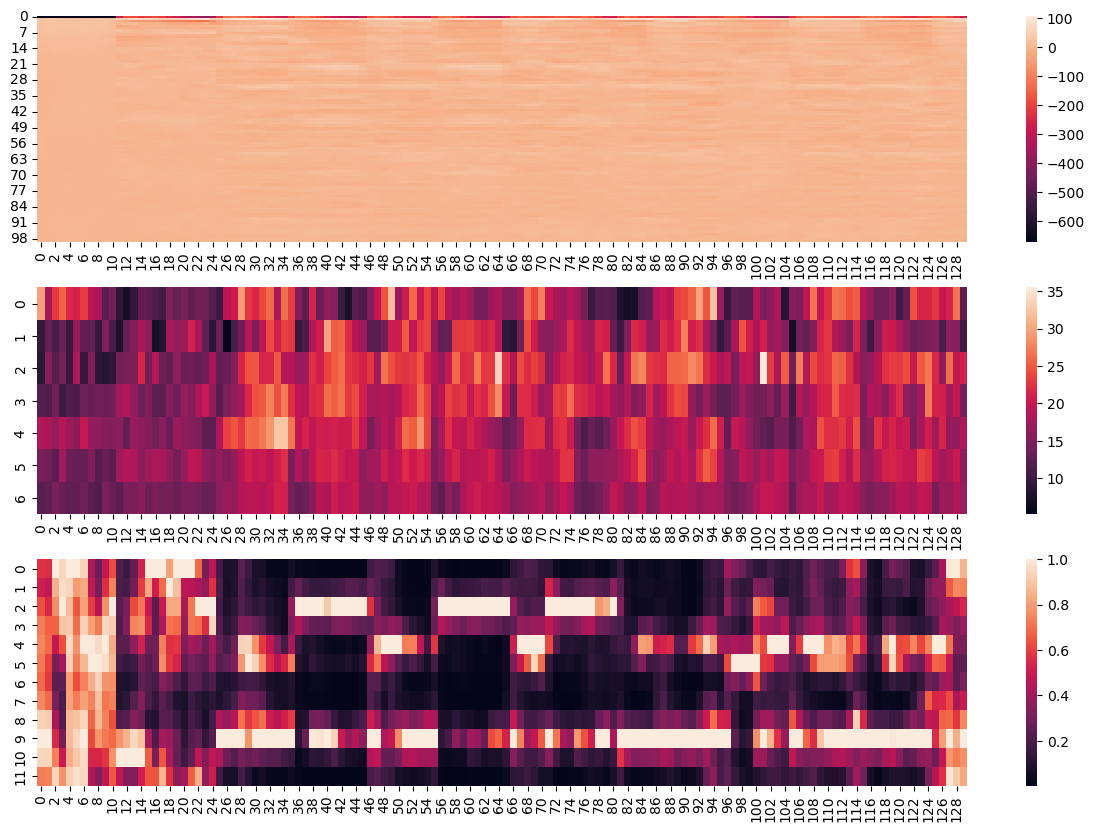

In [49]:
result = extract()

